![SolidQ](https://www.solidq.com/wp-content/uploads/2015/06/Logo-SolidQ-Web.gif)

# Agrupando Frutas

In [0]:
import pandas as pd
fruits = pd.read_csv('fruit_data_with_colors.txt',sep='\t')

In [0]:
fruits.corr()

In [0]:
X_fruits = fruits[['mass','width','height','color_score']]
y_fruits = fruits[['fruit_label']]-1

In [0]:
X_fruits = fruits[['mass','color_score']]
y_fruits = fruits[['fruit_label']]-1

In [0]:
from sklearn.preprocessing import MinMaxScaler
X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=0)
kmeans.fit(X_fruits)

In [0]:
kmeans.labels_

In [0]:
import numpy as np
predY = np.choose(kmeans.labels_, [2, 3, 1, 0]).astype(np.int64) #intentamos asociar el número de cluster con la etiqueta para poder mostrarlos después del mismo color
print (kmeans.labels_)
print (predY)
print(y_fruits.fruit_label)

In [0]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14,7))
 
# Crear colormap
colormap = np.array(['red', 'lime', 'black','yellow'])
 
# Plot de las clasificaciones originales
plt.subplot(1, 2, 1)
plt.scatter(X_fruits.mass, X_fruits.color_score, c=colormap[y_fruits.fruit_label], s=40)
plt.title('Real Classification')
 
# Plot de las clasificaciones del modelo
plt.subplot(1, 2, 2)
plt.scatter(X_fruits.mass, X_fruits.color_score, c=colormap[kmeans.labels_], s=40)
plt.title('K Mean Classification')

In [0]:
import sklearn.metrics as sm

sm.accuracy_score(y_fruits, kmeans.labels_)

# Agrupando las flores

In [0]:

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
 


In [0]:
iris = datasets.load_iris()

In [0]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

Text(0.5, 1.0, 'Petal')

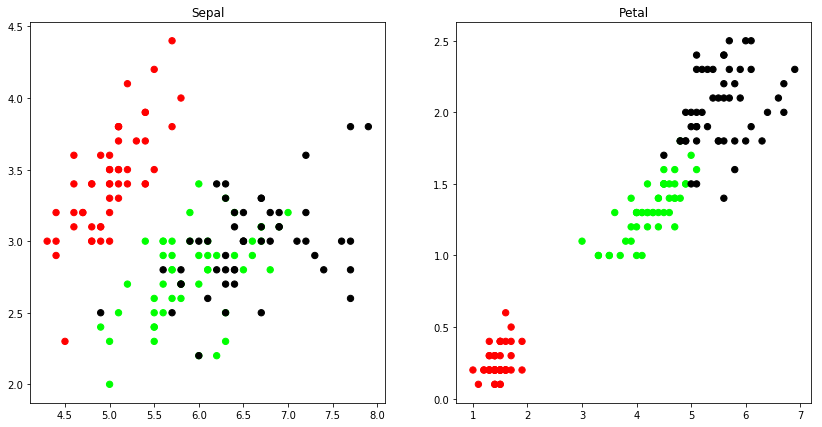

In [4]:
# Configurar tamaño del plot
plt.figure(figsize=(14,7))
 
# Crear un colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

In [5]:
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:

# Resultado
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [0]:
plt.figure(figsize=(14,7))
 
# Crear colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot de las clasificaciones originales
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot de las clasificaciones del modelo
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

In [7]:
sm.accuracy_score(y, model.labels_)

0.24

In [0]:
model = KMeans(n_clusters=3)
model.fit(x)

In [8]:
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print (model.labels_)
print (predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Text(0.5, 1.0, 'K Mean Classification')

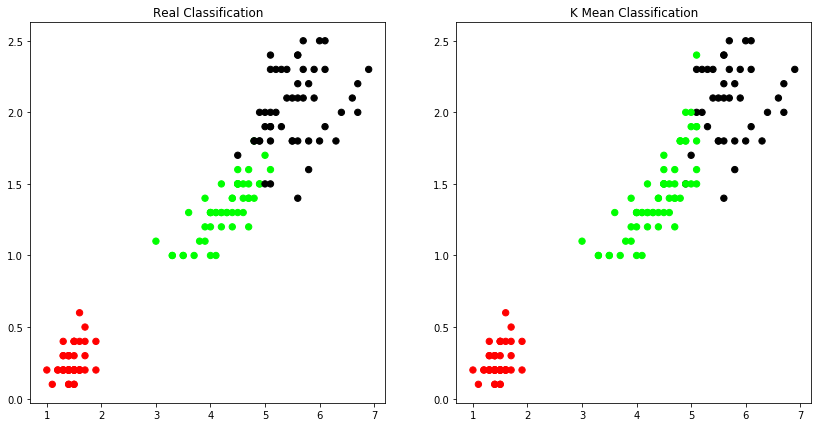

In [9]:
# Ver los resultados
# Configurar el tamaño del plot
plt.figure(figsize=(14,7))
 
# Crear un colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot Predicción con valores corregidos
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')

In [10]:
sm.cluster.contingency_matrix(y,model.labels_)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

In [0]:
sm.confusion_matrix(y,model.labels_)